In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
import sympy
import pickle

In [2]:
df = pd.read_csv('/Users/utkarshvaibhav/Downloads/application_csv.csv')

In [3]:
df.head()

,School,Year,Key,Number_of_Applicants
0,Stanford,2017,Stanford_2017,7899.0
1,Stanford,2018,Stanford_2018,8116.0
2,Stanford,2019,Stanford_2019,8173.0
3,Stanford,2020,Stanford_2020,7797.0
4,Stanford,2021,Stanford_2021,7342.0


In [4]:
df.tail()

,School,Year,Key,Number_of_Applicants
79,Darden,2018,Darden_2018,NaN
80,Darden,2019,Darden_2019,2736.0
81,Darden,2020,Darden_2020,2246.0
82,Darden,2021,Darden_2021,2183.0
83,Darden,2022,Darden_2022,3016.0


In [4]:
df.sort_values(by=['Year'], inplace=True)

In [147]:
df.head()

,School,Year,Key,Number_of_Applicants
0,Stanford,2017,Stanford_2017,7899.0
42,UC Berkeley,2017,UC Berkeley_2017,3592.0
60,NYU Stern,2017,NYU Stern_2017,3696.0
36,Columbia,2017,Columbia_2017,5829.0
30,MIT Sloan,2017,MIT Sloan_2017,4254.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   School                84 non-null     object 
 1   Year                  84 non-null     int64  
 2   Key                   84 non-null     object 
 3   Number_of_Applicants  83 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [6]:
df.loc[(df.Key=='NYU Stern_2017'), 'Number_of_Applicants']=3700
df.loc[(df.Key=='Darden_2018'), 'Number_of_Applicants']=2545

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   School                84 non-null     object 
 1   Year                  84 non-null     int64  
 2   Key                   84 non-null     object 
 3   Number_of_Applicants  84 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ KB


In [151]:
df.describe()

,Year,Number_of_Applicants
count,84.000000,84.000000
mean,2019.500000,4817.309524
std,1.718082,2064.814954
min,2017.000000,2032.000000
25%,2018.000000,3452.000000
50%,2019.500000,4115.000000
75%,2021.000000,6013.250000
max,2022.000000,10351.000000


In [7]:
df.isnull().sum()

School                  0
Year                    0
Key                     0
Number_of_Applicants    0
dtype: int64

In [78]:
duplicatevalues = df.duplicated()
print(duplicatevalues.sum())
df[duplicatevalues]

0


,School,Year,Key,Number_of_Applicants


<AxesSubplot:>

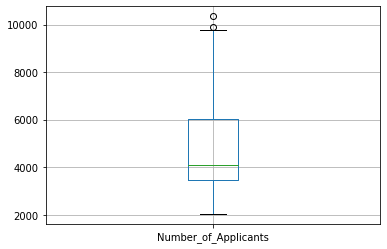

In [79]:
df.boxplot(column=['Number_of_Applicants'])

In [7]:
#IQR is calculated as the difference between the 25th and the 75th percentile of the data. 
#The percentiles can be calculated by sorting the selecting values at specific indices. 
#The IQR is used to identify outliers by defining limits on the sample values that are a factor k of the IQR. 
#The common value for the factor k is the value 1.5.

def removeOutlier(col):
    sorted(col)
    quant1, quant2 = col.quantile([0.25,0.75])
    IQR = quant2-quant1
    lowerRange = quant1-(1.5*IQR)
    upperRange = quant2+(1.5*IQR)
    return lowerRange, upperRange

lowScore, highScore = removeOutlier(df['Number_of_Applicants'])
df['Number_of_Applicants'] = np.where(df['Number_of_Applicants']>highScore, highScore, df['Number_of_Applicants'])
df['Number_of_Applicants'] = np.where(df['Number_of_Applicants']<lowScore, lowScore, df['Number_of_Applicants'])

<AxesSubplot:>

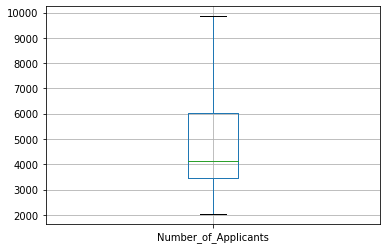

In [8]:
df.boxplot(column=['Number_of_Applicants'])

In [129]:
df.head()

,School,Year,Key,Number_of_Applicants
0,Stanford,2017,Stanford_2017,7899.0
42,UC Berkeley,2017,UC Berkeley_2017,3592.0
60,NYU Stern,2017,NYU Stern_2017,3700.0
36,Columbia,2017,Columbia_2017,5829.0
30,MIT Sloan,2017,MIT Sloan_2017,4254.0


In [9]:
categorical_cols = ['School','Year']
df = pd.get_dummies(df, columns=categorical_cols)
df.head()

,Key,Number_of_Applicants,School_Chicago Booth,School_Columbia,School_Darden,School_Dartmouth,School_Duke Fuqua,School_Harvard,School_Kellogg,School_MIT Sloan,...,School_Stanford,School_UC Berkeley,School_Wharton,School_Yale,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
0,Stanford_2017,7899.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
42,UC Berkeley_2017,3592.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
60,NYU Stern_2017,3700.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36,Columbia_2017,5829.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30,MIT Sloan_2017,4254.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
X = df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values


In [117]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 1 ... 0 0 1]]


In [12]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler()
df['Number_of_Applicants'] = stdscale.fit_transform(df[['Number_of_Applicants']])
df.head()

,Key,Number_of_Applicants,School_Chicago Booth,School_Columbia,School_Darden,School_Dartmouth,School_Duke Fuqua,School_Harvard,School_Kellogg,School_MIT Sloan,...,School_Stanford,School_UC Berkeley,School_Wharton,School_Yale,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
0,Stanford_2017,1.516452,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
42,UC Berkeley_2017,-0.598652,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
60,NYU Stern_2017,-0.545615,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36,Columbia_2017,0.499906,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30,MIT Sloan_2017,-0.273553,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


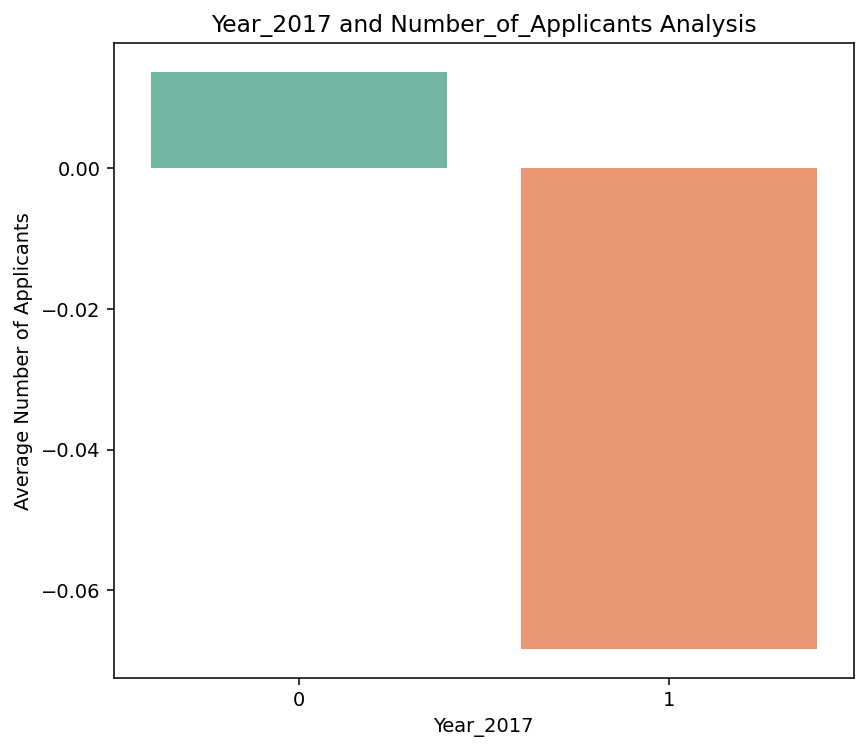

In [92]:
#def biv_analysis(data, feature):
 #   pivot = data.pivot_table(index=feature,values='Number_of_Applicants',aggfunc=np.mean)
  #  plt.figure(figsize = (15,6), dpi = 140)
   # plt.subplot(1,2,1)
    #sns.barplot(x=feature, y='Number_of_Applicants', data=data, palette="Set2", ci=None)
    #plt.title("{} and Number_of_Applicants Analysis".format(feature))
    #plt.ylabel("Average Number of Applicants")

    #plt.subplot(1,2,2)
    #sns.boxplot(x=feature, y='Number_of_Applicants', data=data, palette="Set3")
    #plt.title('{} boxplot'.format(feature))

#biv_analysis(df, 'Year_2017')

In [13]:
y = df.iloc[:, 1].values
y

array([ 1.51645201, -0.59865183, -0.54561463,  0.49990571, -0.27355344,
       -0.66887701,  2.39402122, -1.09906762, -0.20185501, -0.66642158,
       -0.25783872, -0.78771962, -1.14130094,  0.87362152, -0.52744448,
       -0.57065997, -0.71602118,  2.42987043,  0.9173281 , -0.38306544,
       -1.10397847, -0.12671897, -1.112818  , -0.50976541,  1.6230175 ,
       -0.31971545,  0.58780995,  0.43999331,  0.48468207,  0.67620528,
        1.65100935, -0.43413829, -1.08089747, -1.01902073,  2.477076  ,
       -0.35016273, -0.1060934 ,  0.92371221, -0.65119794, -0.06729767,
       -0.49847045, -0.33346583, -0.79705024, -0.48619332, -0.50387239,
       -1.07549553, -0.61583981,  0.36780379, -0.50583673,  2.477076  ,
       -0.16698796, -0.25636546,  0.70419714, -1.25965247,  1.46636133,
        0.59812274, -1.3647447 , -0.63499213, -0.8942851 , -0.62418825,
       -1.29059083,  0.52298671,  0.19101313,  2.16910421, -0.5068189 ,
       -0.1856492 ,  0.53722818,  1.24291757, -0.79410372, -0.87

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x=X.tolist()
print(x)
print(y)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [105]:
print(X_train)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 

In [74]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler(with_mean=False)
#X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
#X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])


In [129]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression().fit(X_train, y_train)


In [130]:
#y_pred = model.predict(X_test)
#y_pred_train = model.predict(X_train)

In [131]:
#print('intercept:', model.intercept_)
#print('slope:', model.coef_) 


intercept: 34863644318331.8
slope: [-2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12
 -2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12 -2.53e+12
 -3.23e+13 -3.23e+13 -3.23e+13 -3.23e+13 -3.23e+13 -3.23e+13]


In [17]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=0.5)
mdl = rdg.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
y_pred_train = mdl.predict(X_train)
print('intercept:', mdl.intercept_)
print('slope:', mdl.coef_) 


intercept: 0.006047434035045488
slope: [-0.19795303  0.51920104 -0.92544642 -1.08338856 -0.6047237   2.1409235
 -0.00575197  0.29147135 -0.76434911 -0.48083037  1.3380848  -0.45263243
  0.77783691 -0.55244201 -0.0638441   0.05579524  0.12340731  0.03543344
 -0.1791539   0.02836202]


In [18]:
np.set_printoptions(precision=2)

In [19]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1))

[[-0.42 -0.51]
 [-0.63 -0.65]
 [-1.1  -1.29]
 [-0.16  0.05]
 [ 0.06 -0.13]
 [ 0.65  0.68]
 [ 0.55  1.06]
 [-0.98 -1.1 ]
 [ 0.33  0.37]
 [-0.41 -0.49]
 [ 1.97  2.17]
 [-0.39 -0.38]
 [ 0.91  0.92]
 [-1.04 -1.08]
 [-0.88 -1.26]
 [ 0.12 -0.11]
 [ 0.04 -0.17]]


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.9508224590005215
mean_sqrd_error is== 0.03992945796049231
root_mean_squared error of is== 0.19982356707979246


In [21]:
score_train=r2_score(y_train,y_pred_train)
print('r2 score is ',score_train)
print('mean_sqrd_error is==',mean_squared_error(y_train,y_pred_train))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_train,y_pred_train)))

r2 score is  0.9715039507811664
mean_sqrd_error is== 0.029741422393006048
root_mean_squared error of is== 0.17245701607358874


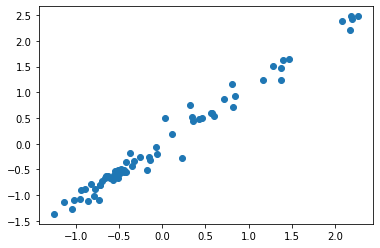

In [22]:
y_pred_sc = stdscale.inverse_transform(y_pred_train)
y_pred_sc

plt.scatter(y_pred_train, y_train)

In [147]:
df.head()


,Key,Number_of_Applicants,School_Chicago Booth,School_Columbia,School_Darden,School_Dartmouth,School_Duke Fuqua,School_Harvard,School_Kellogg,School_MIT Sloan,...,School_Stanford,School_UC Berkeley,School_Wharton,School_Yale,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
0,Stanford_2017,1.516452,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Stanford_2018,1.623017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,Stanford_2019,1.651009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,Stanford_2020,1.466361,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,Stanford_2021,1.242918,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [25]:
pickle.dump(mdl, open('mdl.pkl','wb'))


